## Documentation:
* https://snap.stanford.edu/snappy/doc/index.html
## Data:
* http://snap.stanford.edu/data/wiki-Vote.html
* http://snap.stanford.edu/class/cs224w-data/hw0/stackoverflow-Java.txt.gz

In [95]:
import snap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from collections import defaultdict

# Basic Types

## Vector Types

In [7]:
v = snap.TIntV() # create a empty vector

In [8]:
for i in range(5):
    v.Add(i) # Add elements

In [11]:
print(v.Len())
print("v[2] =", v[2])

5
v[2] = 2


In [12]:
v.SetVal(2,6)
print("v[2] =", v[2])

v[2] = 6


In [13]:
[item for item in v]

[0, 1, 6, 3, 4]

## Hash Table Types

In [15]:
h = snap.TIntStrH()

h[5] = "five"
h[3] = "three"
h[9] = "nine"
h[6] = "six"
h[1] = "one"

print(h.Len())
print("h[3] =", h[3])
print([(key, h[key]) for key in h])

5
h[3] = three
[(5, 'five'), (3, 'three'), (9, 'nine'), (6, 'six'), (1, 'one')]


## Pair Types

In [16]:
p = snap.TIntStrPr(1, "one")

print(p.GetVal1())
print(p.GetVal2())

1
one


## Graph and Network Types

In [2]:
G1 = snap.TNGraph.New()
G2 = snap.TUNGraph.New()
N1 = snap.TNEANet.New()

In [3]:
G1.AddNode(1)
G1.AddNode(5)
G1.AddNode(32)

G1.AddEdge(1,5)
G1.AddEdge(5,1)
G1.AddEdge(5,32)

-1

In [4]:
for NI in G1.Nodes():
    print("node: %d, out-degree %d, in-degree %d" % ( NI.GetId(), NI.GetOutDeg(), NI.GetInDeg()))

node: 1, out-degree 1, in-degree 1
node: 5, out-degree 2, in-degree 1
node: 32, out-degree 0, in-degree 1


In [5]:
for EI in G1.Edges():
    print("edge (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId()))

edge (1, 5)
edge (5, 1)
edge (5, 32)


In [6]:
for NI in G1.Nodes():
    for Id in NI.GetOutEdges():
        print("edge (%d %d)" % (NI.GetId(), Id))

edge (1 5)
edge (5 1)
edge (5 32)


In [35]:
FOut = snap.TFOut("test.graph")
G1.Save(FOut)
FOut.Flush()

In [36]:
FIn = snap.TFIn("test.graph")
G1 = snap.TNGraph.Load(FIn)

In [37]:
snap.SaveEdgeList(G1, "test.txt", "Save as tab-separated list of edges")

In [38]:
G1 = snap.LoadEdgeList(snap.PNGraph, "test.txt", 0, 1)

In [7]:
snap.DrawGViz(G1, snap.gvlDot, "graph1.png", "graph 1")

In [8]:
snap.PlotInDegDistr(G1, "graph1", "graph1 In Degree")

## Homework 0

### 1) Analyzing the Wikipedia voters network

In [2]:
G = snap.LoadEdgeList(snap.PNGraph, "wiki-Vote.txt", 0, 1)

#### The number of nodes in the network

In [3]:
snap.PrintInfo(G, "QA Stats", "qa-info.txt", False)
!cat qa-info.txt

QA Stats: Directed
  Nodes:                    7115
  Edges:                    103689
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         4734
  Zero OutDeg Nodes:        1005
  NonZero In-Out Deg Nodes: 1376
  Unique directed edges:    103689
  Unique undirected edges:  100762
  Self Edges:               0
  BiDir Edges:              5854
  Closed triangles:         608389
  Open triangles:           12720413
  Frac. of closed triads:   0.045645
  Connected component size: 0.993113
  Strong conn. comp. size:  0.182713
  Approx. full diameter:    7
  90% effective diameter:  3.789745


In [4]:
nb_nodes = len([node for node in G.Nodes()]) # G.GetNodes()

nb_self_edge = sum([edge.GetSrcNId() == edge.GetDstNId()
                   for edge in G.Edges()
                   ]) # G.GetEdges()

nb_directed_edge = sum([edge.GetSrcNId() != edge.GetDstNId()
                   for edge in G.Edges()
                   ])

undirected_edge = set()
for edge in G.Edges():
    src = edge.GetSrcNId()
    dst = edge.GetDstNId()
    if src == dst:
        continue
    undirected_edge.update(((src, dst),))
    undirected_edge.update(((dst, src),))
nb_undirected_edge = len(undirected_edge) // 2

reciprocated_edges = set() # snap.CntUniqBiDirEdges(G)
for edge in G.Edges():
    src = edge.GetSrcNId()
    dst = edge.GetDstNId()
    if src != dst and G.IsEdge(dst, src):
        reciprocated_edges.update(((src, dst),))

nb_reciprocated_edge = len(reciprocated_edges) // 2

out_degree_l = []
in_degree_l = []
for node in G.Nodes():
    out_degree_l.append(node.GetOutDeg())
    in_degree_l.append(node.GetInDeg())
nb_nodes_0_out_degree = sum([od == 0 for od in out_degree_l])
nb_nodes_0_in_degree = sum([od == 0 for od in in_degree_l])
nb_nodes_10_out_degree = sum([od > 10 for od in out_degree_l])
nb_nodes_10_in_degree = sum([od < 10 for od in in_degree_l])

print(f'Number of nodes: {nb_nodes}')
print(f'The number of nodes with a self-edge: {nb_self_edge}')
print(f'The number of directed edge: {nb_directed_edge}')
print(f'The number of undirected edges in the network: {nb_undirected_edge}')
print(f'The number of reciprocated edges in the network: {nb_reciprocated_edge}')
print(f'The number of nodes of zero out-degree: {nb_nodes_0_out_degree}')
print(f'The number of nodes of zero in-degree: {nb_nodes_0_in_degree}')
print(f'The number of nodes with more than 10 outgoing edges: {nb_nodes_10_out_degree}')
print(f'The number of nodes with fewer than 10 incoming edges: {nb_nodes_10_in_degree}')

Number of nodes: 7115
The number of nodes with a self-edge: 0
The number of directed edge: 103689
The number of undirected edges in the network: 100762
The number of reciprocated edges in the network: 2927
The number of nodes of zero out-degree: 1005
The number of nodes of zero in-degree: 4734
The number of nodes with more than 10 outgoing edges: 1612
The number of nodes with fewer than 10 incoming edges: 5165


### 2. Further Analyzing the Wikipedia voters network

#### 2.1) distribution of out-degrees of nodes in the network on a log-log scale

Plot the distribution of out-degrees of nodes in the network on a log-log scale.
Each data point is a pair (x, y) where x is a positive integer and y is the number of nodes
in the network with out-degree equal to x. Restrict the range of x between the minimum
and maximum out-degrees. You may filter out data points with a 0 entry. For the log-log
scale, use base 10 for both x and y axes

In [6]:
G = snap.LoadEdgeList(snap.PNGraph, "wiki-Vote.txt", 0, 1)
# snap.PlotOutDegDistr(G, "Wiki Vote", "Wiki Vote") only for low node dimention <100

In [34]:
d = defaultdict(int)
for node in G.Nodes():
    out_degree = node.GetOutDeg()
    if out_degree > 0:
        d[out_degree] += 1
d = dict(d)
l = sorted(d.items(), key=lambda x: x[0])
df = pd.DataFrame(l, columns=["x", "y"])
df.head()

,x,y
0,1,2382
1,2,704
2,3,401
3,4,279
4,5,162


<AxesSubplot:xlabel='x'>

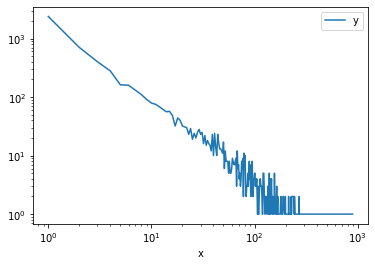

In [35]:
df.plot(x="x", y="y", loglog=True)

#### 2.2) Compute and plot the least-square regression line for the out-degree distribution in the log-log scale plot

Compute and plot the least-square regression line for the out-degree distribution
in the log-log scale plot. Note we want to find coefficients a and b such that the function
log 10 y = a · log 10 x + b, equivalently, y = 10 b · x a , best fits the out-degree distribution.
What are the coefficients a and b? For this part, you might want to use the method called
polyfit in NumPy with deg parameter equal to 1

In [38]:
x_log10 = np.log10(df.x)
y_log10 = np.log10(df.y)
x_log10.shape, y_log10.shape

((237,), (237,))

In [45]:
a, b = np.polyfit(x_log10, y_log10, deg=1)
print(f'Coefficients:\n> a: {a:.2f}\n> b: {b:.2f}')

Coefficients:
> a: -1.28
> b: 3.13


In [49]:
y_log10_pred = a * x_log10 + b

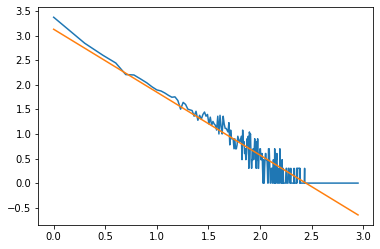

In [51]:
plt.plot(x_log10, y_log10)
plt.plot(x_log10, y_log10_pred)
plt.show()

### 3) Finding Experts on the Java Programming Language on StackOverflow

In [52]:
G = snap.LoadEdgeList(snap.PNGraph, "stackoverflow-Java.txt", 0, 1)

3.1) The number of weakly connected components in the network. This value can be calculated
in Snap.py via function GetWccs

In [56]:
components = snap.TCnComV()
snap.GetWccs(G, components)

In [62]:
print(f'Number of weakly connected components: {components.Len()}')

Number of weakly connected components: 10143


3.2) The number of edges and the number of nodes in the largest weakly connected component.
The largest weakly connected component is calculated in Snap.py with function GetMxWcc

In [64]:
mxwcc = snap.GetMxWcc(G)

In [68]:
print(f'Number of nodes: {mxwcc.GetNodes()}\nNumber of Edges: {mxwcc.GetEdges()}')

Number of nodes: 131188
Number of Edges: 322486


3.3) IDs of the top 3 most central nodes in the network by PagePank scores. PageRank scores
are calculated in Snap.py with function GetPageRank

In [88]:
PRankH = snap.TIntFltH()
snap.GetPageRank(G, PRankH)

In [89]:
def GetTop(hashT, n):
    hashT.SortByDat(False) # AScending order by default
    result = []
    for i, item in enumerate(hashT):
        if i == n:
            break
        result.append((item, round(hashT[item], 4)))
    return result

In [90]:
GetTop(PRankH, 3)

[(992484, 0.014), (135152, 0.01), (22656, 0.0071)]

3.4) IDs of the top 3 hubs and top 3 authorities in the network by HITS scores. HITS scores
are calculated in Snap.py with function GetHits

In [79]:
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(G, NIdHubH, NIdAuthH)

In [91]:
GetTop(NIdHubH, 3)

[(892029, 0.0734), (1194415, 0.0596), (359862, 0.0569)]

In [92]:
GetTop(NIdAuthH, 3)

[(22656, 0.6047), (157882, 0.2987), (571407, 0.2839)]